In [1]:
%load_ext autoreload
%autoreload 2

# Basic dataset stats

In [2]:
# standard path wrangling to be able to import project config and sources
import os
import sys
root = os.path.dirname(os.getcwd())
sys.path.append(root)
print('Project root: {}'.format(root))

Project root: /Users/dasha/code/jcdl_2019


Imports:

In [3]:
# Built-in

# Installed
import pandas as pd
import seaborn as sns

# Custom
from src.utils.config_loader import ConfigLoader
from src.data.dataset_loader import DatasetLoader
from src.visualization.basic_statistics import (
    country_distribution, 
    year_of_publication_distribution, 
    repository_stats, 
    subject_distribution,
    ref_uoa_distribution, 
    crossref_acceptance_date_stats, 
    issn_stats, 
    core_crossref_matching_accuracy
)

Load config:

In [4]:
cfg = ConfigLoader.load_config()

Other setup:

In [5]:
sns.set()
palette = sns.color_palette('muted')
sns.set_palette(palette)

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('max_colwidth', 800)

Paths:

In [6]:
dataset_path = os.path.join(root, 'data', 'dataset.csv')
output_dir = os.path.join(root, cfg['paths']['output_dir'], 'figures/')

## Data

Load data:

In [7]:
df = DatasetLoader().load_dataset(dataset_path)

808984it [01:21, 9955.86it/s] 


In [8]:
df.head(3).transpose()

,0,1,2
core_country_code,[it],[uk],[ch]
core_deposited_date,[2016-09-09 00:00:00],[2017-09-26 00:00:00],[2018-02-07 00:00:00]
core_doi,[10.1001/jama.2014.9143],[None],[10.1001/jamaoto.2016.2981]
core_id_document,[80269649],[96648431],[154258392]
core_id_repository,[1078],[6],[345]
core_metadata_added,[2017-04-13 00:00:00],[2017-10-19 00:00:00],[2018-04-10 00:00:00]
core_oai,[oai:arpi.unipi.it:11568/803546],[oai:arro.anglia.ac.uk:702274],[oai:www.zora.uzh.ch:146921]
core_published_date,[2014],[2017-08-08],[2017]
core_repository_name,[Archivio della Ricerca - Università di Pisa],[Anglia Ruskin Research Online],[ZORA]
cr_accepted,NaT,NaT,NaT


## Dataset size

In [9]:
core_ids = set(x for row in df.core_id_document for x in row)
crossref_dois = set(x for x in df.cr_doi)
core_cr_links = [len(row) for row in df.core_id_document]
print('Unique CORE IDs: {}'.format(len(core_ids)))
print('Unique Crossref DOIs: {}'.format(len(crossref_dois)))
print('Total links between Crossref and CORE: {}'.format(sum(core_cr_links)))

Unique CORE IDs: 948044
Unique Crossref DOIs: 808984
Total links between Crossref and CORE: 985175


## Country distribution

100%|██████████| 808984/808984 [00:00<00:00, 1169826.02it/s]


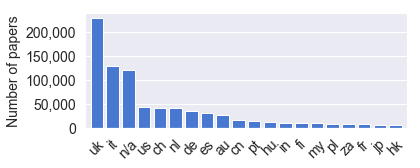

In [10]:
top_x = 20
fig_path = os.path.join(output_dir, 'country_distrib_top{}.pdf'.format(top_x))
country_distribution(df, top_x, fig_path)

## Year of publication distribution

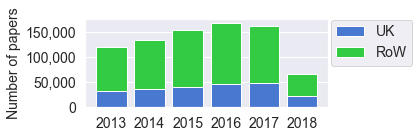

In [11]:
fig_path = os.path.join(output_dir, 'age_distrib.pdf')
year_of_publication_distribution(df, fig_path)

## Repository stats

In [12]:
repository_stats(df)

100%|██████████| 808984/808984 [00:00<00:00, 997678.00it/s]


Number of repositories: 728

Affiliations per paper:
OrderedDict([('nobs', 808984),
             ('minmax', (1, 31)),
             ('mean', 1.157685442480939),
             ('variance', 0.2325189237968152),
             ('skewness', 6.6125773592955),
             ('kurtosis', 110.98922301646468)])

Papers per affiliation:
OrderedDict([('nobs', 728),
             ('minmax', (1, 97594)),
             ('mean', 1286.4684065934066),
             ('variance', 20328198.359385632),
             ('skewness', 14.352248489149522),
             ('kurtosis', 287.12045582263056)])

Number of repositories with less than 100 publications: 315
Number of repositories with less than 50 publications: 255

10 largest repositories


,Papers,Name,ID
0,97594,arXiv.org e-Print Archive,144
1,24019,White Rose Research Online,140
2,20617,ZORA,345
3,20304,Utrecht University Repository,988
4,19267,Enlighten,42
5,17837,Radboud Repository,602
6,17100,ZENODO,324
7,14795,Archivio della ricerca- Università di Roma La Sapienza,1084
8,14261,Online Research @ Cardiff,83
9,14077,Archivio istituzionale della ricerca - Università di Padova,1102


## Subject distribution

664277 out of 808984 papers (82.1125016069539%) have subject information
86731 documents were tagged with multiple subjects (10.72097841242843%)

Subject distribution:


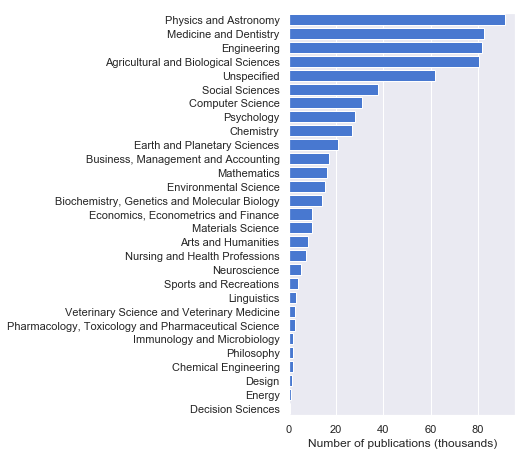


Number of papers per subject count:


,subject_count,paper_count,% of multi-subj. papers
0,2,65419,0.75
1,3,15390,0.18
2,4,4224,0.05
3,5,1236,0.01
4,6,347,0.00
5,7,80,0.00
6,8,25,0.00
7,9,8,0.00
8,10,2,0.00


In [13]:
fig_path = os.path.join(output_dir, 'subject_distrib.pdf')
subject_distribution(df, fig_path)

## REF panel distribution

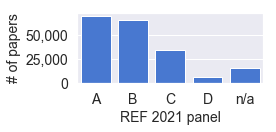

In [14]:
fig_path = os.path.join(output_dir, 'ref_panels_distrib.pdf')
ref_uoa_distribution(df, fig_path)

## Crossref acceptance date statistics

In [15]:
crossref_acceptance_date_stats(df).head()

100%|██████████| 808984/808984 [00:57<00:00, 14188.34it/s]


Non-empty date of acceptance: 975
Date of acceptace == date of publication: 684
Date of acceptace > date of publication: 272


,accepted,published
0,NaT,2014-08-13
1,NaT,2017-08-08
2,NaT,2017-03-01
3,NaT,2014-04-27
4,NaT,2013-10-25


## ISSN statistics

In [16]:
issn_stats(df)

Publications without ISSN: 55014
UK publications without ISSN: 12463


## Matching method analysis

In [17]:
core_crossref_matching_accuracy(df)

100%|██████████| 808984/808984 [00:52<00:00, 15353.98it/s]

There are 985175 links between CrossRef and CORE
354897 CORE articles didn't have a DOI (36.02%)
Of the remaining 630278 CORE articles:
595202 had a matching DOI (94.43%)
35076 had a different DOI (5.57%)
5264 non-matching DOIs were matched as substring (15.01%)
Same + substring DOIs: 600466 (95.27%)
